In [ ]:
# TP1 HOMEWORK - TITANIC SHIPWRECK

#0)

import pandas as pd

raw_data = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
raw_data.shape[1]


12

In [ ]:
#1)

#data cleaning


data = raw_data[['Age','Survived']]
data_cleaned = data.dropna(how='any')

#data sorting

survived = data_cleaned[data_cleaned['Survived']  == 1]
deceased = data_cleaned[data_cleaned['Survived'] == 0 ]

#percentage surved

percentage_survived = len(survived)/(len(survived)+len(deceased))
print(f'the survuvers were {percentage_survived*100} %')

the survuvers were 40.61624649859944 %


In [ ]:
#2)

#plot the two categories based on age

import matplotlib.pyplot as plt

%matplotlib inline
fig, ax = plt.subplots(1,2, figsize=(20,7), sharex=True)
plt.suptitle("Age distribution", fontsize=16)
ax[0].set_title(f"survived", fontsize=14)
ax[0].hist(survived['Age'], color ='darkgreen')
ax[0].set_xlabel("Age", fontsize = 14)
ax[0].set_ylabel("# (people)", fontsize = 14)

ax[1].set_title(f"deceased", fontsize=14)
ax[1].hist(deceased['Age'], color ='gray')
ax[1].set_xlabel("Age", fontsize = 14)
ax[1].set_ylabel("# (people)", fontsize = 14)

In [ ]:
#3)

#data cleaning


data_fare = raw_data[['Fare','Survived']]
data_cleaned_fare = data_fare.dropna(how='any')

#data sorting

survived_fare = data_cleaned_fare[data_cleaned_fare['Survived'] == 1]
deceased_fare = data_cleaned_fare[data_cleaned_fare['Survived'] == 0 ]

#fare difference
average_fare_survived = survived_fare['Fare'].mean()
average_fare_deceased = deceased_fare['Fare'].mean()
fare_difference = average_fare_survived-average_fare_deceased
print(f"the average fare difference between survivde and deceased was {fare_difference} dollars, {len(survived)} people survived out of 891")


the average fare difference between survivde and deceased was 26.27752071709328 dollars, 342 people survived out of 891


In [ ]:
#4) could this 26 dollar difference just be given by the low sample number? basically you remove the survived/deceased aspect and only look at the fares, you re-shuffle these and the take the average of the first 342 knowing that
#this was the number of people that survived and do the same fot the deceased. When you do the difference the fact that this is so much smaller means that there must be some correlation between the fare price and survival that
#cannot be explained by simple chance (that would mean in this case the chance that with small data sample we obtained a big difference in the two averages.)

#create a list with all the fares

global_stat = list(survived_fare['Fare']) + list(deceased_fare['Fare'])

#create random datasets to test null hypothesis

import random

trials = 10000  ; count = 0

for dumb in range(trials):
    random.shuffle(global_stat)
    avg_fare_survived = sum(global_stat[:342])/342
    avg_fare_deceased = sum(global_stat[342:])/549
    diff = avg_fare_survived - avg_fare_deceased
    if diff > fare_difference:
        count +=1

print(f"the number of times the fare difference was greater in the shuffled datatsed than in the historical one was {count}")

the number of times the fare difference was greater in the shuffled datatsed than in the historical one was 0


Fare had a lot to do with survival rate


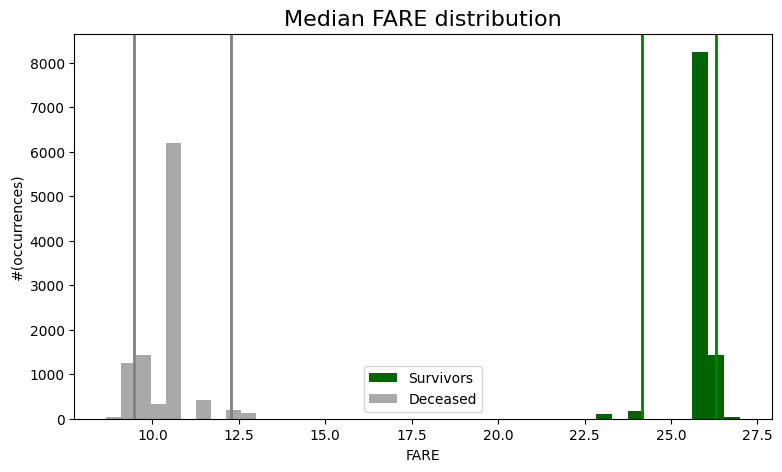

In [ ]:
#5-6-7) use bootstrap for each of the two groups: Plot the median FARE distribution, including the relative confidence intervals
import numpy as np

survived_fare_np = pd.Series.to_numpy(survived_fare['Fare'])
deceased_fare_np = pd.Series.to_numpy(deceased_fare['Fare'])

reps = 10000
n = len(global_stat)

np.random.seed(123)

boot_survived = np.random.choice(survived_fare_np, (reps, n), replace=True)   #if u dont specify replace it defaults to true
boot_survived_medians = np.median(boot_survived, axis=1) #axis=1 specifies the operator (in this case median) will be applied row wise (the direction the samples are stored)
boot_deceased = np.random.choice(deceased_fare_np, (reps,n))
boot_deceased_medians = np.median(boot_deceased, axis=1)


#now for the confidence interval,

boot_survived_median_CI = np.percentile(boot_survived_medians, [2.5, 97.5]) #means that the confidence interval contains 95% of values
boot_deceased_median_CI = np.percentile(boot_deceased_medians, [2.5,97.5])

#plot

fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot(111)
plt.title("Median FARE distribution", size = 16)
ax.hist(boot_survived_medians, color ='darkgreen', label = f"Survivors")
plt.axvline(boot_survived_median_CI[0],color = 'green',linewidth=2)
plt.axvline(boot_survived_median_CI[1],color = 'green',linewidth=2)
ax.hist(boot_deceased_medians, color ='darkgray', label = f"Deceased")
plt.axvline(boot_deceased_median_CI[0],color = 'gray',linewidth=2)
plt.axvline(boot_deceased_median_CI[1],color = 'gray',linewidth=2)
ax.set(xlabel ="FARE" , ylabel = "#(occurrences)")
ax.legend();


print("Fare had a lot to do with survival rate")

In [ ]:
#8)

variance_boot_survived_median = np.var(boot_survived_medians)
variance_boot_deceased_median = np.var(boot_deceased_medians)
print(f"the variance for the boot survived and deceased median are respectively {variance_boot_survived_median} and {variance_boot_deceased_median}")

the variance for the boot survived and deceased median are respectively 0.16813463030388717 and 0.38866280224929767


In [ ]:
#9) compute the number of survived women to the number of men

data_gender = raw_data[['Sex','Survived']]
data_cleaned_gender = data_gender.dropna(how='any')

#data sorting

survived = data_cleaned_gender[data_cleaned_gender['Survived']  == 1]
survived_male = survived[survived['Sex'] == 'male']
survived_female = survived[survived['Sex'] == 'female']

print(f"The probability of a woman surviving out of the total survivors was {len(survived_female)/len(survived)*100} %")

The probability of a woman surviving out of the total survivors was 68.12865497076024 %


In [ ]:
#10a) compute the probability of a male surviving in each of the three classes on the ship

data_gender_class = raw_data[['Sex','Survived','Pclass']]
data_cleaned_gender_class = data_gender_class.dropna(how='any')

survived = data_cleaned_gender_class[data_cleaned_gender_class['Survived']  == 1]
survived_male = survived[survived['Sex'] == 'male']
survived_male_Pclass1 = survived_male[survived_male['Pclass'] == 1]
survived_male_Pclass2 = survived_male[survived_male['Pclass'] == 2]
survived_male_Pclass3 = survived_male[survived_male['Pclass'] == 3]

diff_Pclass = len(survived_male_Pclass3) - len(survived_male_Pclass2)

#print(f"The percentge of the males that survived was {len(survived_male_Pclass1)/len(survived_male)*100} % out of class one, {len(survived_male_Pclass2)/len(survived_male)*100}% out of class 2 and {len(survived_male_Pclass3)/len(survived_male)*100}% out of class 3")
#print(f"The difference in percentage from group 3 to 2 was {(len(survived_male_Pclass3)/len(survived_male)*100)-(len(survived_male_Pclass2)/len(survived_male)*100)}")
print(f"The difference in number of people from group 3 to 2 was {diff_Pclass}")


The difference in number of people from group 3 to 2 was 30


In [ ]:
#10b)

#global_stat_Pclass = list(survived_male_Pclass1['Pclass']) + list(survived_male_Pclass2['Pclass']) + list(survived_male_Pclass3['Pclass'])
#print(len(global_stat_Pclass))

#here we are trying to prove that it's not by chance that group two saw far less survivors. my reasoning was that we can randomly assign values between 1 and 3 to a 109 item list (number of total male survivors) and we can iteratively
#see how often it happens that there is such a big difference betweenn group 3 and 2. Running the test we se it never happens so there must be an external reason (for example different conditions in the groups: position
# in the boat, social status, size etc) to explain the big differenct in number of people that survived.

import random

trials = 10000
count = 0
total_people = 109

for dumb in range(trials):
    # Create a list of 109 random integers between 1 and 3
    global_stat_Pclass_ran = [random.randint(1, 3) for _ in range(total_people)]

    class_1 = global_stat_Pclass_ran.count(1)
    class_2 = global_stat_Pclass_ran.count(2)
    class_3 = global_stat_Pclass_ran.count(3)
    if diff_Pclass > fare_difference:  # Assuming fare_difference is defined earlier
        count += 1

# Print the result after the trials
print(f"The number of times the random class attribution had a larger difference in males surviving from class three in respect to two, in regards to the historical data was {count}")





The number of times the random class attribution had a larger difference in males surviving from class three in respect to two, in regards to the historical data was 0
